<a href="https://colab.research.google.com/github/samarthsoni17/ideal-ML-train/blob/workbench/Linear%20Regression/Multiple_Regression_Startups_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load the data

In [2]:
# Load the data from a .csv in the same folder. 
# From Google Drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/Datasets/365DSc/Linear Regression/Startups.csv'
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Let's check what's inside this data frame
data.head()

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,State,Profit
0,165349.20,136897.80,471784.10,Florida,192261.83
1,162597.70,151377.59,443898.53,Florida,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,Florida,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# This method gives us very nice descriptive statistics.
data.describe()

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Regression

In [5]:
# our dependent variable (y) is the Profitabilty of start up
y = data ['Profit']
# After running regression on all available variables, we find that the only significant variable is R&D Expenditure
# thus our independent variable (x) is the R&D Expenditure
x1 = data [['R&D Expenditure']] 

In [6]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           3.50e-32
Time:                        12:07:03   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Expenditure     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot

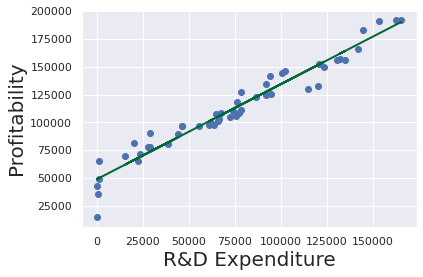

In [12]:
# Create a scatter plot of SAT and GPA
plt.scatter(data['R&D Expenditure'],y)
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat = (4.903e+04) + 	0.8543*data['R&D Expenditure']

# Plot the two regression lines
fig = plt.plot(data['R&D Expenditure'],yhat, lw=2, c='#006837')

# Name your axes :)
plt.xlabel('R&D Expenditure', fontsize = 20)
plt.ylabel('Profitability', fontsize = 20)
plt.show()

## Make predictions based on the regressions we create

In [8]:
x.head() #const = x0 i.e. whose coefficient is b0; thus here it contains only 1's

,const,R&D Expenditure
0,1.0,165349.20
1,1.0,162597.70
2,1.0,153441.51
3,1.0,144372.41
4,1.0,142107.34


In [9]:
new_data = pd.DataFrame({'const':1, 'R&D Expenditure': [125000]})
#since data frames usually arrange columns in alphabetical order, I will overwrite new_data with the columns in the order specified by me
new_data = new_data[['const', 'R&D Expenditure']]

#I will further change the indices for the model but we do not need to do this IRL
# new_data.rename(index={0:'Person1',1:'Person2'})

#printing the DF we created
new_data

,const,R&D Expenditure
0,1,125000


In [10]:
predictions = results.predict(new_data) #results = fitted regression = sm.OLS(y,x).fit()
predictions

0    155819.320509
dtype: float64

In [13]:
#we transform it into  dataframe and join it with the earlier one
predictions_df = pd.DataFrame( {'Predictions' : predictions})

joined = new_data.join(predictions_df)

joined.rename(index={0:'Startup1'})

,const,R&D Expenditure,Predictions
Startup1,1,125000,155819.320509
